<a href="https://colab.research.google.com/github/rajkumar17513/rajkumar17513/blob/main/Best_ML_model_for_crop_yield_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
yield_data=pd.read_csv('finaldataset.csv')

FileNotFoundError: ignored

In [ ]:
yield_data.shape

(28242, 8)

In [ ]:
yield_data.head()

,index,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [ ]:
yield_data=yield_data.drop(['index'],axis=1)

In [ ]:
yield_data = yield_data.rename(index=str, columns={"Item":"crop_name","Area": "Country","hg/ha_yield":"yield_value",
                                                   "average_rain_fall_mm_per_year":"avg_rainfall",
                                                   "pesticides_tonnes":"pesticides"})
yield_data.head()

,Country,crop_name,Year,yield_value,avg_rainfall,pesticides,avg_temp
0,Albania,Maize,1990,36613,1485,121.0,16.37
1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,Albania,Soybeans,1990,7000,1485,121.0,16.37


**Summary of dataset**

In [ ]:
yield_data.describe()

,Year,yield_value,avg_rainfall,pesticides,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


printing top 10 countries which consumes more yield

In [ ]:
yield_data.groupby(['Country'],sort=True)['yield_value'].sum().nlargest(10)

Country
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: yield_value, dtype: int64

Printing the crop which consumes more yield in each country

In [ ]:
yield_data.groupby(['crop_name','Country'],sort=True)['yield_value'].sum().nlargest(10)

crop_name       Country       
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: yield_value, dtype: int64

In [ ]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cy_correlation=yield_data.select_dtypes(include=[np.number]).corr()
cy_correlation

,Year,yield_value,avg_rainfall,pesticides,avg_temp
Year,1.000000,0.091630,-0.003798,0.140930,0.014409
yield_value,0.091630,1.000000,0.000962,0.064085,-0.114777
avg_rainfall,-0.003798,0.000962,1.000000,0.180984,0.313040
pesticides,0.140930,0.064085,0.180984,1.000000,0.030946
avg_temp,0.014409,-0.114777,0.313040,0.030946,1.000000


pearsons correlation: 0.092
pearsons correlation: 0.001
pearsons correlation: 0.064
pearsons correlation: -0.115


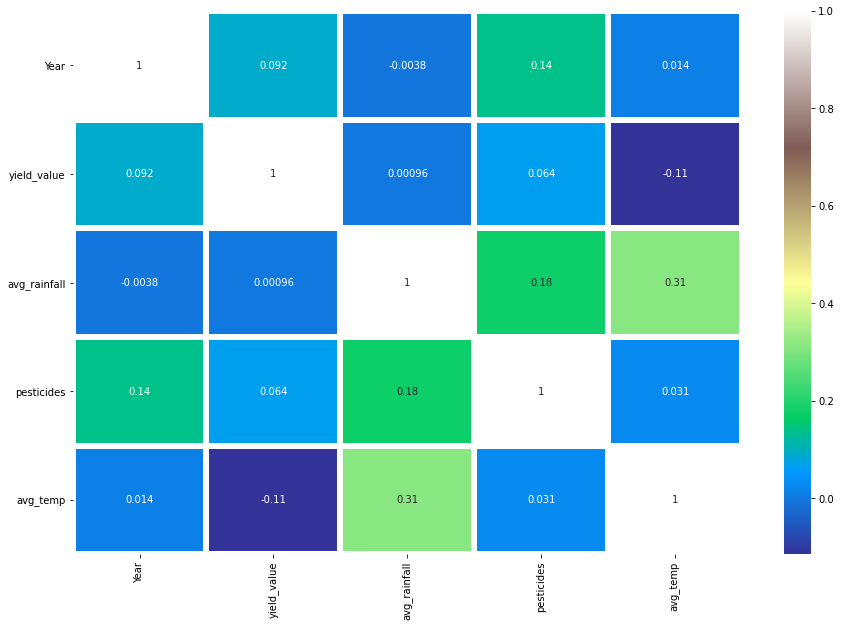

In [ ]:
from scipy.stats import pearsonr
cor,_=pearsonr(yield_data['Year'],yield_data['yield_value'])
print('pearsons correlation: %.3f'%cor)
 
cor,_=pearsonr(yield_data['avg_rainfall'],yield_data['yield_value'])
print('pearsons correlation: %.3f'%cor)
 
cor,_=pearsonr(yield_data['pesticides'],yield_data['yield_value'])
print('pearsons correlation: %.3f'%cor)
 
cor,_=pearsonr(yield_data['avg_temp'],yield_data['yield_value'])
print('pearsons correlation: %.3f'%cor)
 
sns.heatmap(yield_data.corr(),annot=True,cmap='terrain',linewidth=5)
cy=plt.gcf()
cy.set_size_inches(15,10)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cy_onehot=pd.get_dummies(yield_data,columns=["Country","crop_name"],prefix=["Country","crop_name"])
cp=cy_onehot.loc[:,cy_onehot.columns != 'yield_value']
label=yield_data['yield_value']
cp.head()

,Year,avg_rainfall,pesticides,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chile,Country_Colombia,Country_Croatia,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Eritrea,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Ghana,Country_Greece,...,Country_Niger,Country_Norway,Country_Pakistan,Country_Papua New Guinea,Country_Peru,Country_Poland,Country_Portugal,Country_Qatar,Country_Romania,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Thailand,Country_Tunisia,Country_Turkey,Country_Uganda,Country_Ukraine,Country_United Kingdom,Country_Uruguay,Country_Zambia,Country_Zimbabwe,crop_name_Cassava,crop_name_Maize,crop_name_Plantains and others,crop_name_Potatoes,"crop_name_Rice, paddy",crop_name_Sorghum,crop_name_Soybeans,crop_name_Sweet potatoes,crop_name_Wheat,crop_name_Yams
0,1990,1485,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1990,1485,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1990,1485,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1990,1485,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1990,1485,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
cp=cp.drop(['Year'],axis=1)

In [ ]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28242 entries, 0 to 28241
Columns: 114 entries, avg_rainfall to crop_name_Yams
dtypes: float64(2), int64(1), uint8(111)
memory usage: 3.9+ MB


In [ ]:
cp.head()

,avg_rainfall,pesticides,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chile,Country_Colombia,Country_Croatia,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Eritrea,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Ghana,Country_Greece,Country_Guatemala,...,Country_Niger,Country_Norway,Country_Pakistan,Country_Papua New Guinea,Country_Peru,Country_Poland,Country_Portugal,Country_Qatar,Country_Romania,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Thailand,Country_Tunisia,Country_Turkey,Country_Uganda,Country_Ukraine,Country_United Kingdom,Country_Uruguay,Country_Zambia,Country_Zimbabwe,crop_name_Cassava,crop_name_Maize,crop_name_Plantains and others,crop_name_Potatoes,"crop_name_Rice, paddy",crop_name_Sorghum,crop_name_Soybeans,crop_name_Sweet potatoes,crop_name_Wheat,crop_name_Yams
0,1485,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1485,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1485,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1485,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1485,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cp=scaler.fit_transform(cp)
cp

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels=train_test_split(cp,label,test_size=0.3,random_state=42)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
def compare_models(model):
  model_name=model.__class__.__name__
  fit=model.fit(train_data,train_labels)
  y_pred=fit.predict(test_data)
  r2=r2_score(test_labels,y_pred)
  MAE=mean_absolute_error(test_labels,y_pred)
  MSE=mean_squared_error(test_labels,y_pred)
  return ([model_name,r2,MAE,MSE])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
 
models=[GradientBoostingRegressor(),RandomForestRegressor(),
        DecisionTreeRegressor(),AdaBoostRegressor()]

In [ ]:
model_train=list(map(compare_models,models))

In [ ]:
print(*model_train,sep="\n")

['GradientBoostingRegressor', 0.8661912002570227, 20296.592895355076, 991810520.1779041]
['RandomForestRegressor', 0.9733688049443684, 5708.19300511288, 197394337.8299486]
['DecisionTreeRegressor', 0.960156988456268, 6111.848086077343, 295322266.40211713]
['AdaBoostRegressor', 0.5185254517892706, 52947.88515157615, 3568760223.7712116]


In [ ]:
from sklearn import preprocessing
s0=[]
s1=[]
s2=[]
s3=[]
for i in range(len(model_train)):
  s0.append(model_train[i][0])
  s1.append(model_train[i][1])
  s2.append(model_train[i][2])
  s3.append(model_train[i][3])
 
s11=np.array(s1)/max(s1)
s22=np.array(s2)/max(s2)
s33=np.array(s3)/max(s3)

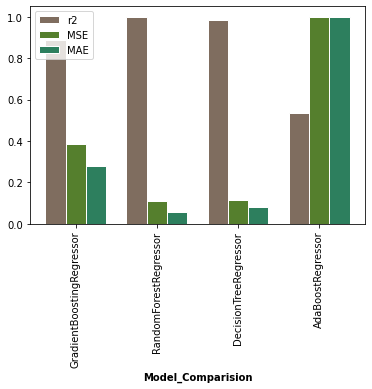

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
barWidth = 0.25
r1 = np.arange(len(s11))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, s11, color='#7f6d5f', width=barWidth, edgecolor='white', label='r2')
plt.bar(r2, s22, color='#557f2d', width=barWidth, edgecolor='white', label='MSE')
plt.bar(r3, s33, color='#2d7f5e', width=barWidth, edgecolor='white', label='MAE')
plt.xlabel('Model_Comparision', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(s11))],s0)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
cy_onehot =cy_onehot.drop(['Year'], axis=1)

In [ ]:
cy_onehot.head()

,yield_value,avg_rainfall,pesticides,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chile,Country_Colombia,Country_Croatia,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Eritrea,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Ghana,Country_Greece,...,Country_Niger,Country_Norway,Country_Pakistan,Country_Papua New Guinea,Country_Peru,Country_Poland,Country_Portugal,Country_Qatar,Country_Romania,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Thailand,Country_Tunisia,Country_Turkey,Country_Uganda,Country_Ukraine,Country_United Kingdom,Country_Uruguay,Country_Zambia,Country_Zimbabwe,crop_name_Cassava,crop_name_Maize,crop_name_Plantains and others,crop_name_Potatoes,"crop_name_Rice, paddy",crop_name_Sorghum,crop_name_Soybeans,crop_name_Sweet potatoes,crop_name_Wheat,crop_name_Yams
0,36613,1485,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,66667,1485,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,23333,1485,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,12500,1485,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,7000,1485,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
cy_test=pd.DataFrame(test_data,columns=cy_onehot.loc[:,cy_onehot.columns != 'yield_value'].columns)
country=cy_test[[col for col in cy_test.columns if 'Country' in col]].stack()[cy_test[[col for col in cy_test.columns if 'Country' in col]].stack()>0]
countrylist=list(pd.DataFrame(country).index.get_level_values(1))
countries=[i.split("_")[1] for i in countrylist]
item=cy_test[[col for col in cy_test.columns if 'crop_name' in col]].stack()[cy_test[[col for col in cy_test.columns if 'crop_name' in col]].stack()>0]
itemlist=list(pd.DataFrame(item).index.get_level_values(1))
items=[i.split("_")[2] for i in itemlist]

In [ ]:
cy_test.head()

,avg_rainfall,pesticides,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chile,Country_Colombia,Country_Croatia,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Eritrea,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Ghana,Country_Greece,Country_Guatemala,...,Country_Niger,Country_Norway,Country_Pakistan,Country_Papua New Guinea,Country_Peru,Country_Poland,Country_Portugal,Country_Qatar,Country_Romania,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Thailand,Country_Tunisia,Country_Turkey,Country_Uganda,Country_Ukraine,Country_United Kingdom,Country_Uruguay,Country_Zambia,Country_Zimbabwe,crop_name_Cassava,crop_name_Maize,crop_name_Plantains and others,crop_name_Potatoes,"crop_name_Rice, paddy",crop_name_Sorghum,crop_name_Soybeans,crop_name_Sweet potatoes,crop_name_Wheat,crop_name_Yams
0,0.183443,0.110716,0.542078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.458451,0.000413,0.627257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.183443,0.106159,0.518228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.000000,0.224154,0.890971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.458451,0.000355,0.625213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
cy_test.drop([col for col in cy_test.columns if 'crop_name' in col],axis=1,inplace=True)
cy_test.drop([col for col in cy_test.columns if 'Country' in col],axis=1,inplace=True)
cy_test.head()

,avg_rainfall,pesticides,avg_temp
0,0.183443,0.110716,0.542078
1,0.458451,0.000413,0.627257
2,0.183443,0.106159,0.518228
3,1.000000,0.224154,0.890971
4,0.458451,0.000355,0.625213


In [ ]:
cy_test['Country']=countries
cy_test['crop_name']=items
cy_test.head()

,avg_rainfall,pesticides,avg_temp,Country,crop_name
0,0.183443,0.110716,0.542078,Spain,"Rice, paddy"
1,0.458451,0.000413,0.627257,Madagascar,Wheat
2,0.183443,0.106159,0.518228,Spain,Sorghum
3,1.000000,0.224154,0.890971,Colombia,Potatoes
4,0.458451,0.000355,0.625213,Madagascar,Sweet potatoes


**Implementing Individual ML Algorithms**

**Gradient Boosting**

In [ ]:
gb=GradientBoostingRegressor()
model1=gb.fit(train_data,train_labels)
cy_test["yield_predicted"]=model1.predict(test_data)
cy_test["yield_actual"]=pd.DataFrame(test_labels)["yield_value"].tolist()
test_grp1=cy_test.groupby("crop_name")
q1=test_grp1.apply(lambda x:pd.Series(r2_score(x.yield_actual,x.yield_predicted),index=['score']))
q1.sort_values(by=['score'],ascending=False)

,score
crop_name,
Cassava,0.735649
Yams,0.718454
Potatoes,0.693084
Sweet potatoes,0.565816
Plantains and others,0.538415
Wheat,0.523807
"Rice, paddy",0.504945
Sorghum,0.466916
Maize,0.343709


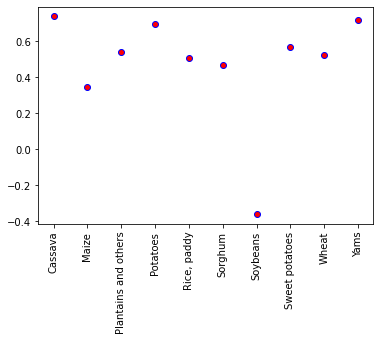

In [ ]:
s1=list(q1.reset_index().crop_name.values)
fig, ax=plt.subplots()
plt.xticks(rotation=90)
ax.scatter(y=q1['score'],x=s1,marker='o',c='r',edgecolor='b')

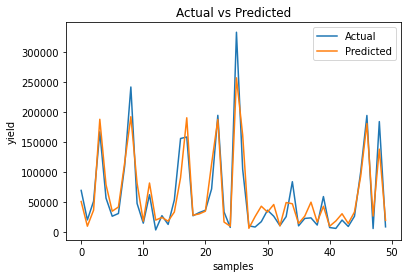

In [ ]:
plt.plot(cy_test.yield_actual[:50],label='Actual')
plt.plot(cy_test.yield_predicted[:50],label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("samples")
plt.ylabel("yield")
plt.legend()
plt.show()

**Decision Tree**

In [ ]:
dt=DecisionTreeRegressor()
model2=dt.fit(train_data,train_labels)
cy_test["yield_predicted"]= model2.predict(test_data)
cy_test["yield_actual"]=pd.DataFrame(test_labels)["yield_value"].tolist()
test_group2=cy_test.groupby("crop_name")
q0=test_group2.apply(lambda x:pd.Series(r2_score(x.yield_actual,x.yield_predicted),index=['score']))
q0.sort_values(by=['score'],ascending=False)

,score
crop_name,
Yams,0.930890
Cassava,0.927920
Wheat,0.924348
Potatoes,0.909482
"Rice, paddy",0.895521
Maize,0.893618
Soybeans,0.852750
Sweet potatoes,0.841277
Sorghum,0.800867


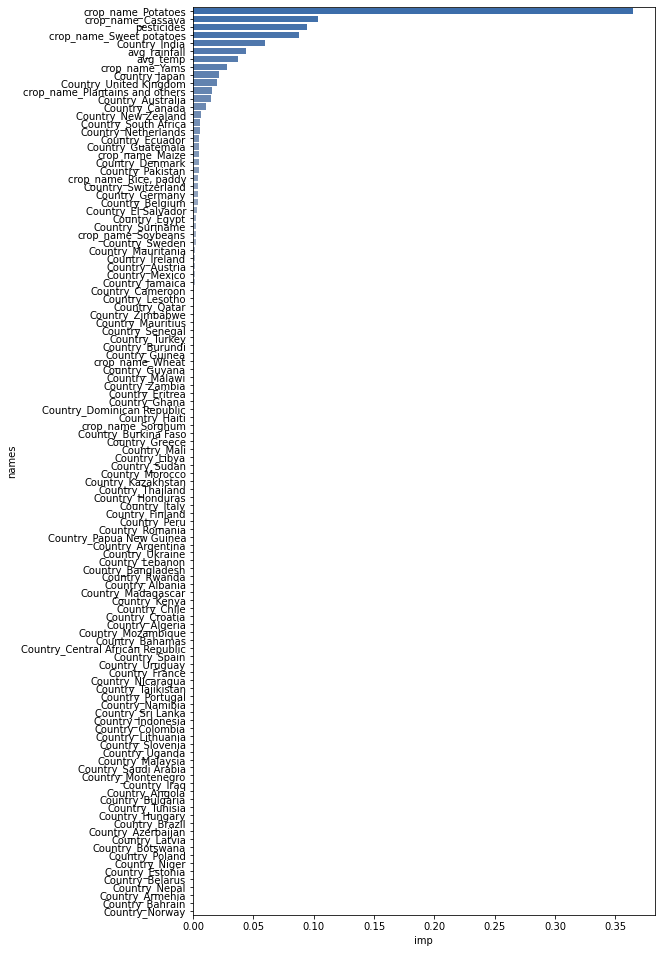

In [ ]:
varimp= {'imp':model2.feature_importances_,'names':cy_onehot.columns[cy_onehot.columns!="yield_value"]}
a4_dims = (8.27,16.7)
fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax)

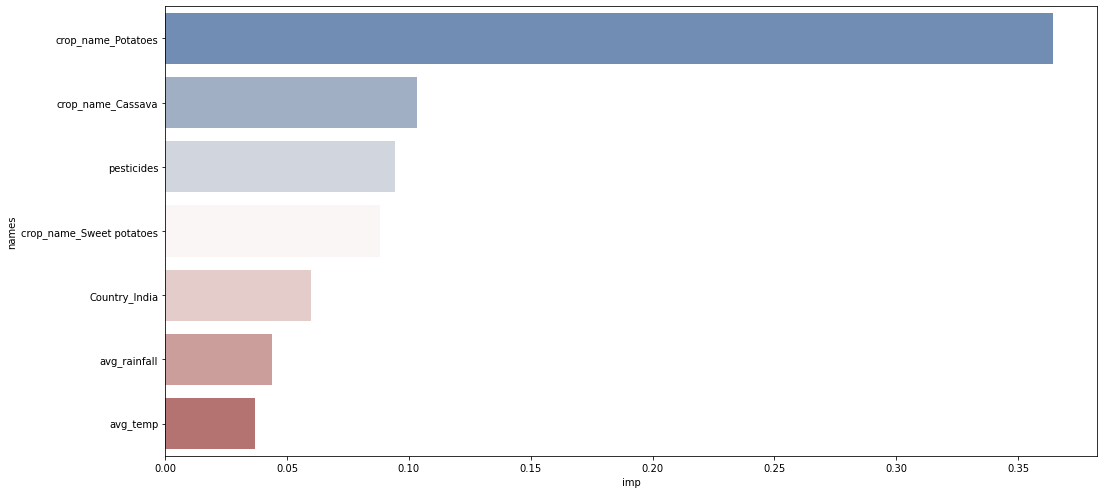

In [ ]:
a4_dims = (16.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
df=df.nlargest(7, 'imp')
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

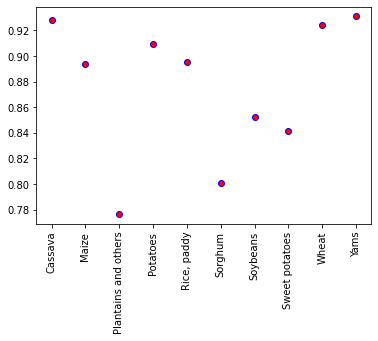

In [ ]:
s1=list(q0.reset_index().crop_name.values)
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.scatter(y=q0['score'], x=s1, marker='o', c='r', edgecolor='b')

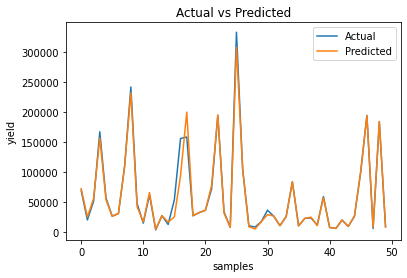

In [ ]:
plt.plot(cy_test.yield_actual[:50],label='Actual')
plt.plot(cy_test.yield_predicted[:50],label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("samples")
plt.ylabel("yield")
plt.legend()
plt.show()

**Ada Boost Regressor**

In [ ]:
abr=AdaBoostRegressor()
model3=abr.fit(train_data,train_labels)
cy_test["yield_predicted"]= model3.predict(test_data)
cy_test["yield_actual"]=pd.DataFrame(test_labels)["yield_value"].tolist()
test_group3=cy_test.groupby("crop_name")
q3=test_group3.apply(lambda x:pd.Series(r2_score(x.yield_actual,x.yield_predicted),index=['score']))
q3.sort_values(by=['score'],ascending=False)

,score
crop_name,
Cassava,0.681361
Potatoes,0.443695
Sweet potatoes,0.030959
Yams,-0.081275
Plantains and others,-0.151678
Maize,-4.101079
"Rice, paddy",-7.473172
Wheat,-10.679358
Sorghum,-15.025042


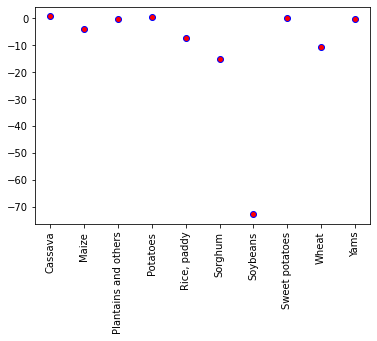

In [ ]:
s1=list(q3.reset_index().crop_name.values)
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.scatter(y=q3['score'], x=s1, marker='o', c='r', edgecolor='b')

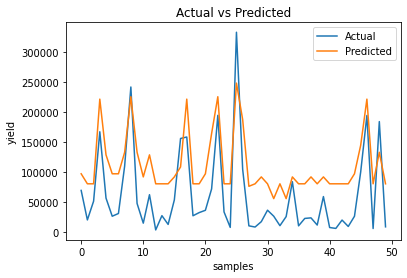

In [ ]:
plt.plot(cy_test.yield_actual[:50],label='Actual')
plt.plot(cy_test.yield_predicted[:50],label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("samples")
plt.ylabel("yield")
plt.legend()
plt.show()

**Random Forest Regressor**

In [ ]:
rfr=RandomForestRegressor(max_depth=10)
model5=rfr.fit(train_data,train_labels)
cy_test["yield_predicted"]= model5.predict(test_data)
cy_test["yield_actual"]=pd.DataFrame(test_labels)["yield_value"].tolist()
test_group5=cy_test.groupby("crop_name")
q4=test_group5.apply(lambda x:pd.Series(r2_score(x.yield_actual,x.yield_predicted),index=['score']))
q4.sort_values(by=['score'],ascending=False)

,score
crop_name,
Yams,0.950086
Cassava,0.935024
Potatoes,0.839628
Sweet potatoes,0.836260
Plantains and others,0.816408
Maize,0.635691
"Rice, paddy",0.577101
Wheat,0.558881
Sorghum,0.538222


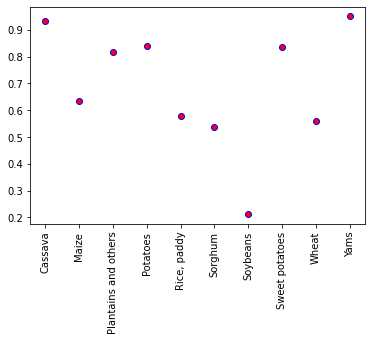

In [ ]:
s1=list(q4.reset_index().crop_name.values)
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.scatter(y=q4['score'], x=s1, marker='o', c='r', edgecolor='b')

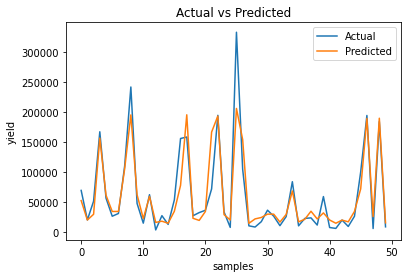

In [ ]:
plt.plot(cy_test.yield_actual[:50],label='Actual')
plt.plot(cy_test.yield_predicted[:50],label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("samples")
plt.ylabel("yield")
plt.legend()
plt.show()

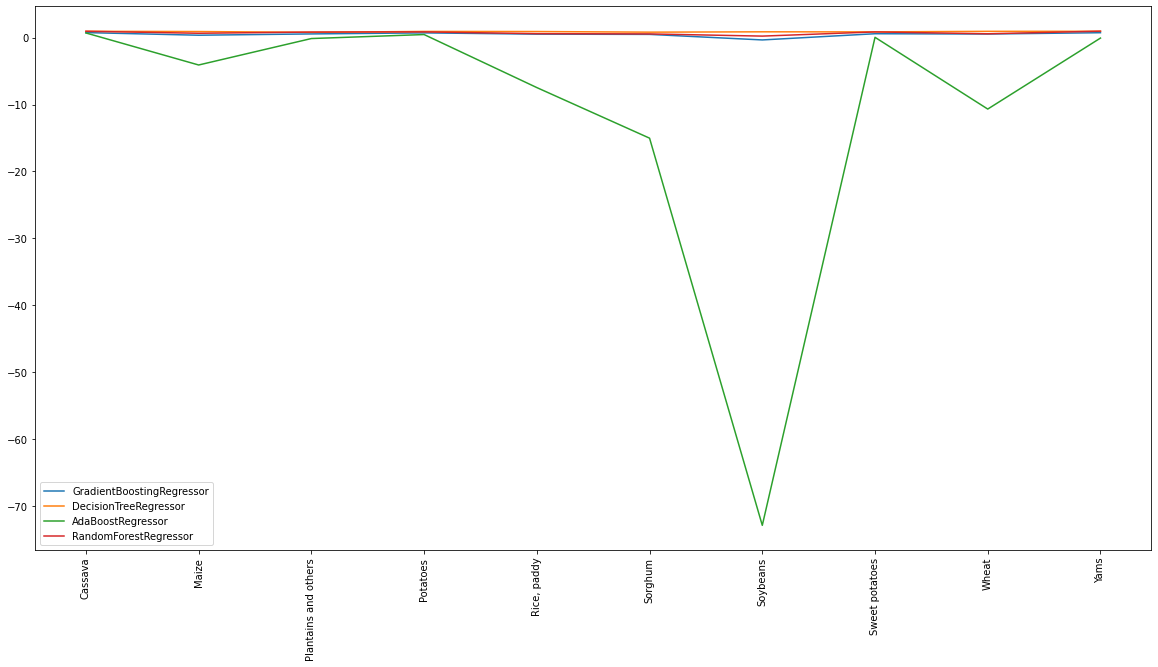

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.plot(q1,label="GradientBoostingRegressor")
plt.plot(q0,label="DecisionTreeRegressor")
plt.plot(q3,label="AdaBoostRegressor")
plt.plot(q4,label="RandomForestRegressor")
plt.xticks(rotation=90)
plt.legend()
plt.show()

# **Ensembling Algorithms**

**ensembling of AdaBoost Regressor with Decision Tree Regressor**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ens1=AdaBoostRegressor(DecisionTreeRegressor())
m1=ens1.fit(train_data,train_labels)
cy_test["yield_predicted"]=m1.predict(test_data)
cy_test["yield_actual"]=pd.DataFrame(test_labels)["yield_value"].tolist()
test_group6=cy_test.groupby("crop_name")
q6=test_group6.apply(lambda x:pd.Series(r2_score(x.yield_actual,x.yield_predicted),index=['score']))
q6.sort_values(by=['score'],ascending=False)

,score
crop_name,
Yams,0.952310
Wheat,0.948980
Cassava,0.941512
Potatoes,0.933832
"Rice, paddy",0.922507
Maize,0.916722
Sweet potatoes,0.883319
Sorghum,0.871057
Soybeans,0.858880


In [ ]:
r2_score(cy_test["yield_predicted"],cy_test["yield_actual"])

0.9687718466401303

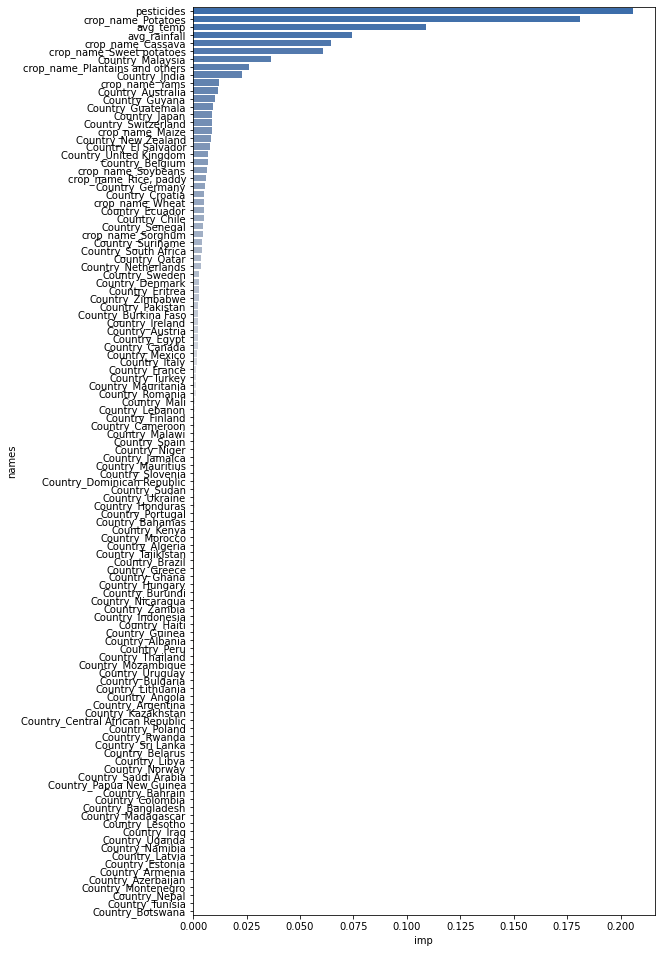

In [ ]:
varimp= {'imp':m1.feature_importances_,'names':cy_onehot.columns[cy_onehot.columns!="yield_value"]}
a4_dims = (8.27,16.7)
fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax)

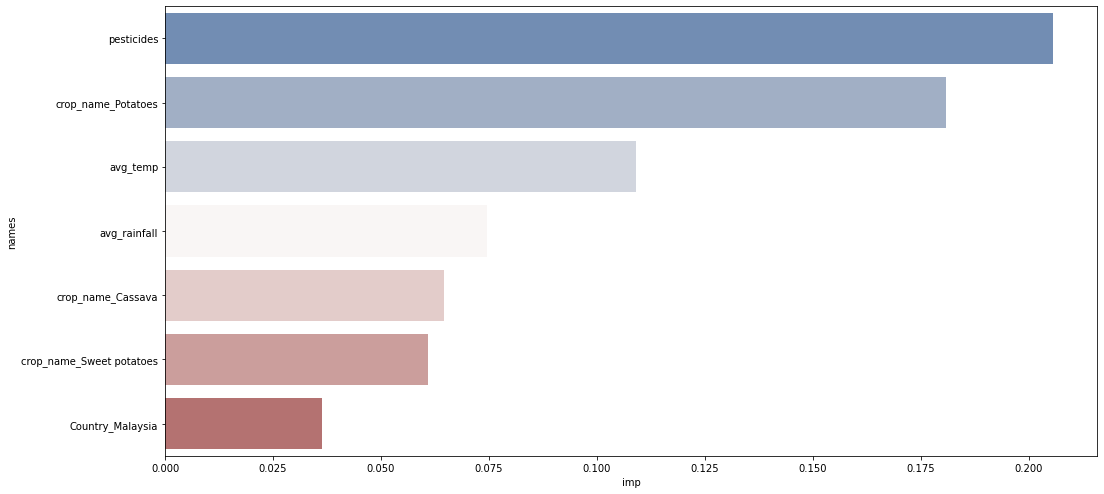

In [ ]:
a4_dims = (16.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
df=df.nlargest(7, 'imp')
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

In [ ]:
def adjusted_r2_6(y,yhat,x):
  score=1-(((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
  return score
s6=test_group6.apply(lambda x: pd.Series(adjusted_r2_6(x.yield_actual,x.yield_predicted,x),index=['score']))
s6.sort_values(by=['score'],ascending=False)

,score
crop_name,
Yams,0.950637
Wheat,0.948625
Cassava,0.940753
Potatoes,0.933424
"Rice, paddy",0.921863
Maize,0.916184
Sweet potatoes,0.882233
Sorghum,0.869902
Soybeans,0.857735


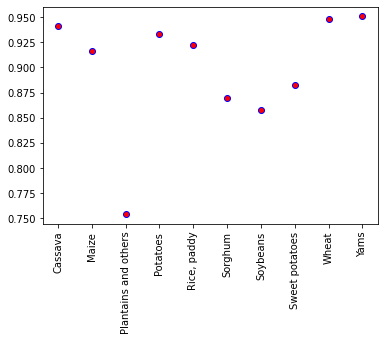

In [ ]:
q2=list(s6.reset_index().crop_name.values)
fig,ax=plt.subplots()
plt.xticks(rotation=90)
ax.scatter(y=s6['score'],x=q2,marker='o',c='r',edgecolor='b')

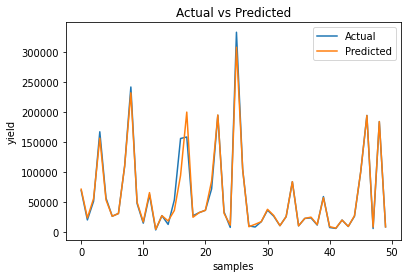

In [ ]:
plt.plot(cy_test.yield_actual[:50],label='Actual')
plt.plot(cy_test.yield_predicted[:50],label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("samples")
plt.ylabel("yield")
plt.legend()
plt.show()

**Ensembling of Random forest Regressor with AdaBoost Regressor**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ens2=AdaBoostRegressor(RandomForestRegressor())
m2=ens2.fit(train_data,train_labels)
cy_test["yield_predicted"]=m2.predict(test_data)
cy_test["yield_actual"]=pd.DataFrame(test_labels)["yield_value"].tolist()
test_group7=cy_test.groupby("crop_name")
q7=test_group7.apply(lambda x:pd.Series(r2_score(x.yield_actual,x.yield_predicted),index=['score']))
q7.sort_values(by=['score'],ascending=False)

,score
crop_name,
Yams,0.941037
Cassava,0.935326
Potatoes,0.930253
Sweet potatoes,0.889328
Maize,0.858364
"Rice, paddy",0.837615
Plantains and others,0.834465
Wheat,0.832819
Sorghum,0.766170


In [ ]:
r2_score(cy_test["yield_predicted"],cy_test["yield_actual"])

0.9630263121539856

In [ ]:
def adjusted_r2_7(y,yhat,x):
  score=1-(((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
  return score
s7=test_group7.apply(lambda x: pd.Series(adjusted_r2_7(x.yield_actual,x.yield_predicted,x),index=['score']))
s7.sort_values(by=['score'],ascending=False)

,score
crop_name,
Yams,0.938968
Cassava,0.934486
Potatoes,0.929824
Sweet potatoes,0.888298
Maize,0.857449
"Rice, paddy",0.836264
Wheat,0.831653
Plantains and others,0.825922
Sorghum,0.764075


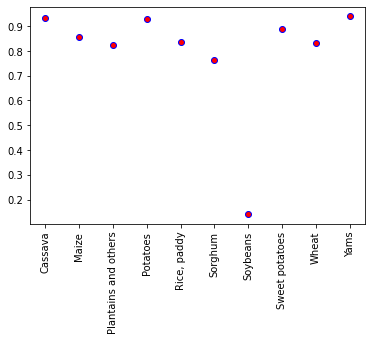

In [ ]:
q2=list(s7.reset_index().crop_name.values)
fig,ax=plt.subplots()
plt.xticks(rotation=90)
ax.scatter(y=s7['score'],x=q2,marker='o',c='r',edgecolor='b')

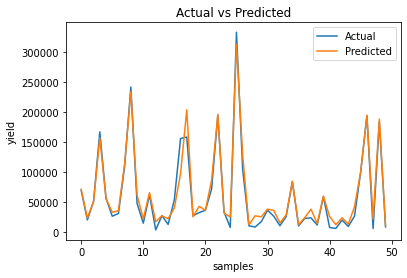

In [ ]:
plt.plot(cy_test.yield_actual[:50],label='Actual')
plt.plot(cy_test.yield_predicted[:50],label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("samples")
plt.ylabel("yield")
plt.legend()
plt.show()

In [ ]:
max_depth_range=list(range(1, 25))
accuracy=[]
for depth in max_depth_range:
    clf11=DecisionTreeRegressor(max_depth=depth,random_state=0)
    clf11.fit(train_data,train_labels)
    score=clf11.score(test_data,test_labels)
    accuracy.append(score)
print(accuracy)

[0.3910321844525194, 0.51233418926378, 0.6739363644710917, 0.7413467612573929, 0.7942353456830746, 0.8242476387945554, 0.8548190841988216, 0.8814229063670128, 0.9036613916958353, 0.9221645677285936, 0.9340437047780943, 0.9409934062746185, 0.9457079448971271, 0.9491941638767551, 0.9536871328330105, 0.9560877254850597, 0.9578485570468962, 0.9598453699912103, 0.960922015325987, 0.9609292880752591, 0.9622694931415541, 0.9622308767988084, 0.9608970717753059, 0.9611080950800629]


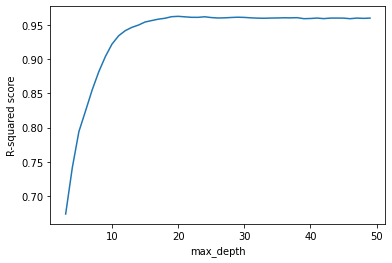

In [ ]:
qscore=[]
a=[]
for i in range(3,50,1):
    a.append(i)
    regressor=DecisionTreeRegressor(max_depth=i)
    regressor.fit(train_data,train_labels)
    y_pred=regressor.predict(test_data)
    qscore.append(r2_score(test_labels,y_pred))
 
plt.plot(a,qscore)
plt.xlabel('max_depth')
plt.ylabel('R-squared score')
plt.show()

**Ensembling Decision Tree Regressor with Random Forest Regressor**

In [ ]:
ens3=RandomForestRegressor(n_estimators=100,max_depth=10)
m3=ens3.fit(train_data,train_labels)
cy_test["yield_predicted"]=m3.predict(test_data)
cy_test["yield_actual"]=pd.DataFrame(test_labels)["yield_value"].tolist()
test_group8=cy_test.groupby("crop_name")
q8=test_group8.apply(lambda x:pd.Series(r2_score(x.yield_actual,x.yield_predicted),index=['score']))
q8.sort_values(by=['score'],ascending=False)

,score
crop_name,
Yams,0.952033
Cassava,0.936259
Potatoes,0.838292
Sweet potatoes,0.835038
Plantains and others,0.815313
Maize,0.635571
"Rice, paddy",0.573531
Wheat,0.555510
Sorghum,0.547134


In [ ]:
 r2_score(cy_test["yield_predicted"],cy_test["yield_actual"])

0.9313075553789918

In [ ]:
def adjusted_r2_8(y,yhat,x):
  score=1-(((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
  return score
s8=test_group8.apply(lambda x: pd.Series(adjusted_r2_8(x.yield_actual,x.yield_predicted,x),index=['score']))
s8.sort_values(by=['score'],ascending=False)

,score
crop_name,
Yams,0.950349
Cassava,0.935432
Potatoes,0.837296
Sweet potatoes,0.833502
Plantains and others,0.805780
Maize,0.633216
"Rice, paddy",0.569985
Wheat,0.552410
Sorghum,0.543077


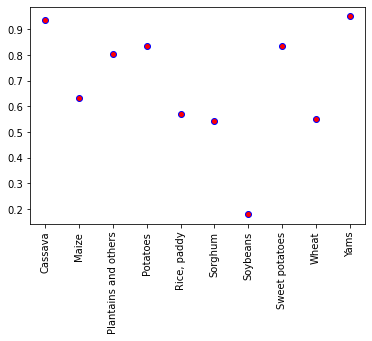

In [ ]:
q2=list(s8.reset_index().crop_name.values)
fig,ax=plt.subplots()
plt.xticks(rotation=90)
ax.scatter(y=s8['score'],x=q2,marker='o',c='r',edgecolor='b')

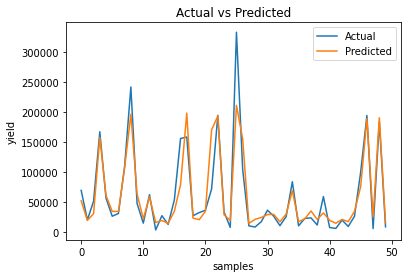

In [ ]:
plt.plot(cy_test.yield_actual[:50],label='Actual')
plt.plot(cy_test.yield_predicted[:50],label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("samples")
plt.ylabel("yield")
plt.legend()
plt.show()

**Ensembling of Gradient Boosting Regressor with Decision Tree Regressor**

In [ ]:
ens4=GradientBoostingRegressor(n_estimators=200,max_depth=25,random_state=0)
m4=ens4.fit(train_data,train_labels)
cy_test["yield_predicted"]=m4.predict(test_data)
cy_test["yield_actual"]=pd.DataFrame(test_labels)["yield_value"].tolist()
test_group9=cy_test.groupby("crop_name")
q9=test_group9.apply(lambda x:pd.Series(r2_score(x.yield_actual,x.yield_predicted),index=['score']))
q9.sort_values(by=['score'],ascending=False)

,score
crop_name,
Cassava,0.933879
Yams,0.931107
Wheat,0.930449
Potatoes,0.912768
"Rice, paddy",0.906375
Maize,0.902180
Soybeans,0.865243
Sweet potatoes,0.845336
Plantains and others,0.818415


In [ ]:
 r2_score(cy_test["yield_predicted"],cy_test["yield_actual"])

0.9619843947003873

In [ ]:
def adjusted_r2_9(y,yhat,x):
  score=1-(((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
  return score
s9=test_group9.apply(lambda x: pd.Series(adjusted_r2_9(x.yield_actual,x.yield_predicted,x),index=['score']))
s9.sort_values(by=['score'],ascending=False)

,score
crop_name,
Cassava,0.933021
Wheat,0.929964
Yams,0.928690
Potatoes,0.912231
"Rice, paddy",0.905596
Maize,0.901547
Soybeans,0.864150
Sweet potatoes,0.843896
Sorghum,0.810769


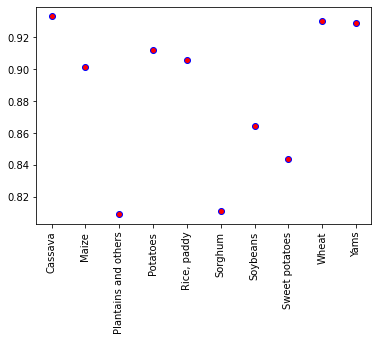

In [ ]:
q2=list(s9.reset_index().crop_name.values)
fig,ax=plt.subplots()
plt.xticks(rotation=90)
ax.scatter(y=s9['score'],x=q2,marker='o',c='r',edgecolor='b')

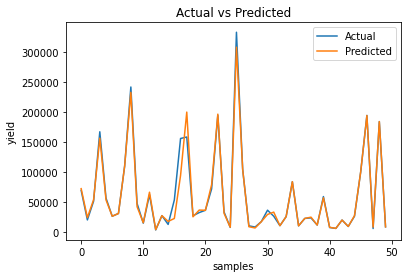

In [ ]:
plt.plot(cy_test.yield_actual[:50],label='Actual')
plt.plot(cy_test.yield_predicted[:50],label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("samples")
plt.ylabel("yield")
plt.legend()
plt.show()

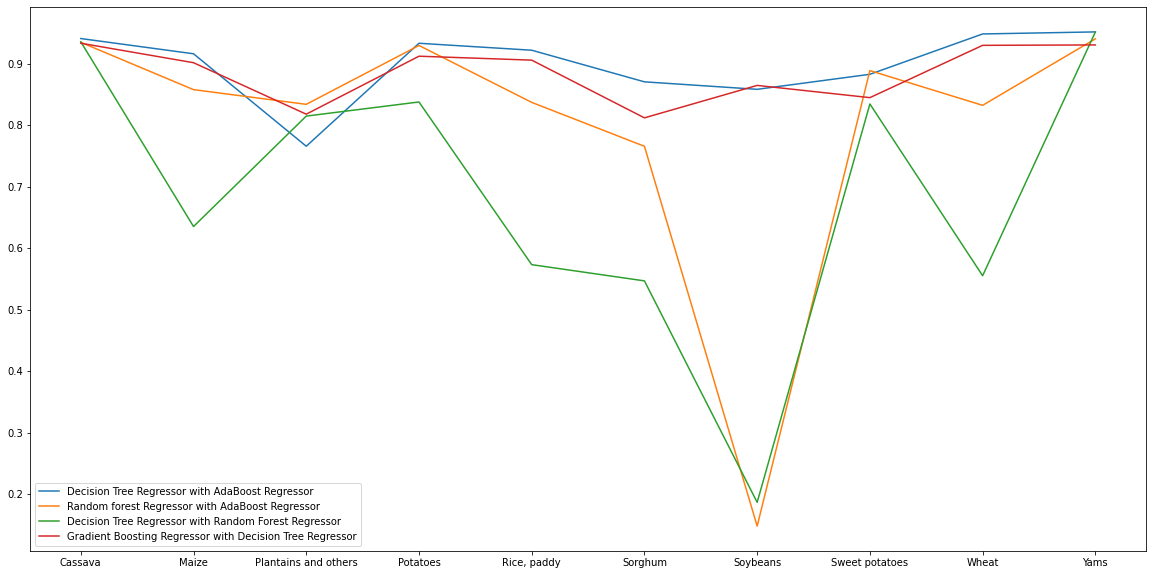

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.plot(q6,label="Decision Tree Regressor with AdaBoost Regressor")
plt.plot(q7,label="Random forest Regressor with AdaBoost Regressor")
plt.plot(q8,label="Decision Tree Regressor with Random Forest Regressor")
plt.plot(q9,label="Gradient Boosting Regressor with Decision Tree Regressor")
plt.legend()
plt.show()

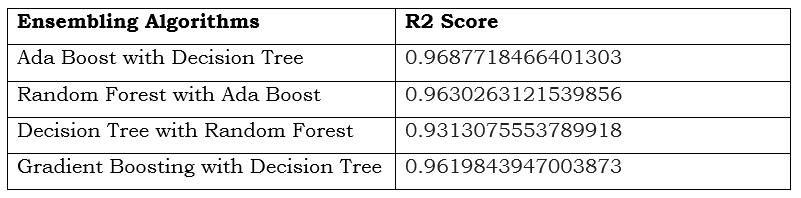

**Individual Algorithms Results** 

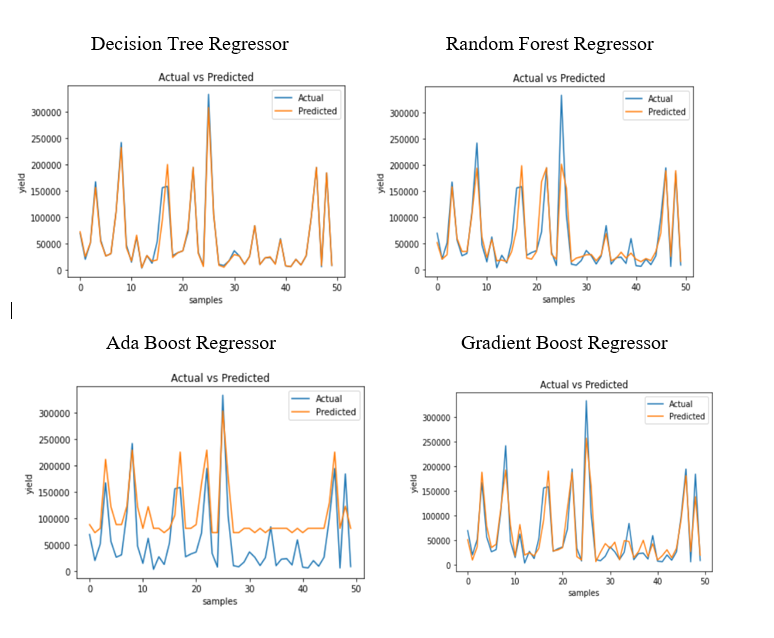

**Combination Algorithms Results**

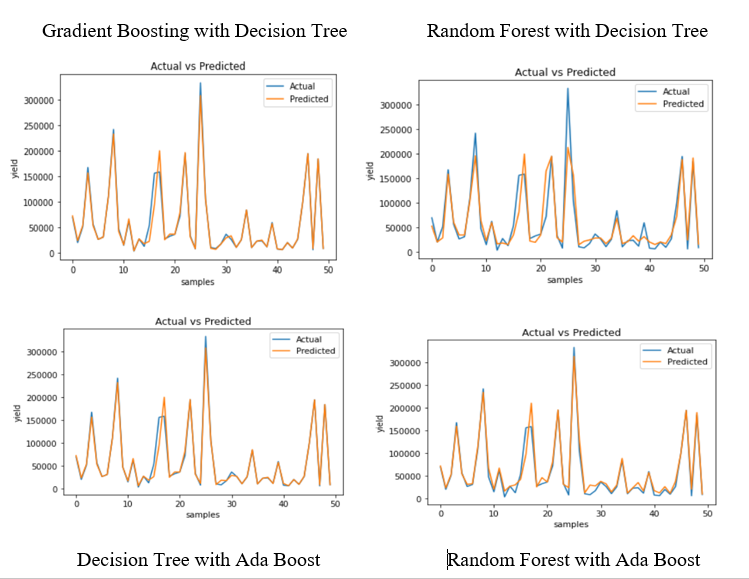

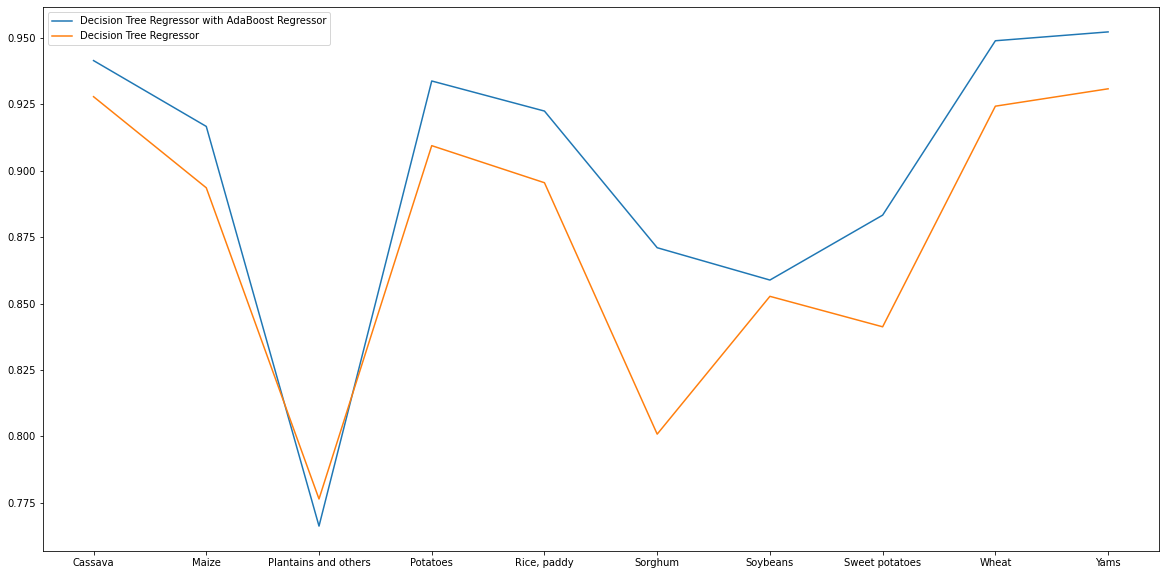

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.plot(q6,label="Decision Tree Regressor with AdaBoost Regressor")
plt.plot(q0,label="Decision Tree Regressor")
plt.legend()
plt.show()

**R2 Scores of Combination Algorithms**

**1) Decision Tree With AdaBoost   2)Random Forest With AdaBoost   3) with A   4)GradientBoost with DecisionTree**

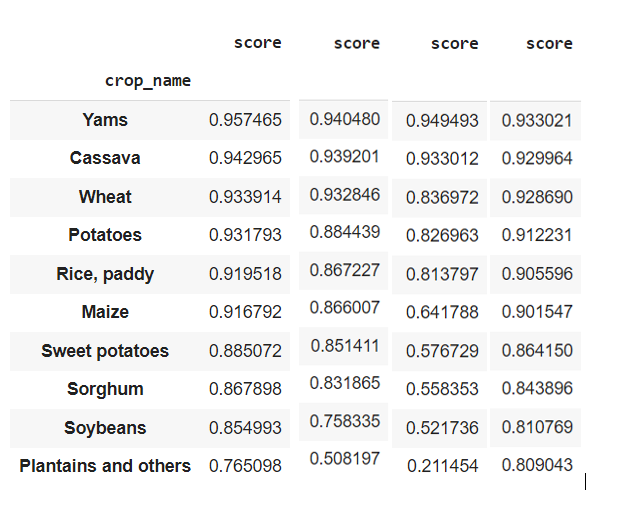